In [1]:
# This is a dataset taken from Kaggle Machine Learning Datasets. In this FallDetection dataset, we will be looking at the fall among the elderly as an important health issue. We will be using Machine Learning to detect how to prevent falls among our elderly people.   

In [2]:
# Let us start by uploading our packages for this project. Basically, this part will be memorized by anyone who does Machine Learning or Python coding since this is the first step in programming with Python. I am now using Jupyter Notebook for this Learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Now that we have the tools that we need to at least start the project, we are going to firstly import the data. Now I hope you remember where you stored your excel or csv file because you will need to know that in order to import it. I am going to call my variable DetectFall. It is good to have a name that is associated with what you are doing so that if anyy other person were to stumble on your project, they would be able to understand what the dataset is
detectfall = pd.read_excel('C:/Users/Delmafia91/Downloads/falldetection.xlsx')

In [4]:
# Moving on to our next step, it is a constant reminder that we know what the dataset looks like. We are going to look at the default amount of rows that will be displayed.
print(detectfall.head())

   ACTIVITY     TIME        SL      EEG  BP   HR  CIRCLUATION
0         3  4722.92   4019.64 -1600.00  13   79          317
1         2  4059.12   2191.03 -1146.08  20   54          165
2         2  4773.56   2787.99 -1263.38  46   67          224
3         4  8271.27   9545.98 -2848.93  26  138          554
4         4  7102.16  14148.80 -2381.15  85  120          809


In [5]:
# If you prefer another amount than the default one provided by Python Jupyter, you can customize yours. Let us take a look at what I mean
print(detectfall.head(3)); print(detectfall.head(8))

   ACTIVITY     TIME       SL      EEG  BP  HR  CIRCLUATION
0         3  4722.92  4019.64 -1600.00  13  79          317
1         2  4059.12  2191.03 -1146.08  20  54          165
2         2  4773.56  2787.99 -1263.38  46  67          224
   ACTIVITY     TIME        SL      EEG  BP   HR  CIRCLUATION
0         3  4722.92   4019.64 -1600.00  13   79          317
1         2  4059.12   2191.03 -1146.08  20   54          165
2         2  4773.56   2787.99 -1263.38  46   67          224
3         4  8271.27   9545.98 -2848.93  26  138          554
4         4  7102.16  14148.80 -2381.15  85  120          809
5         5  7015.24   7336.79 -1699.80  22   95          427
6         3  8620.28  24949.90 -3198.06  35  157         1519
7         3  9238.73  39245.50 -2590.00  15  196         1885


In [6]:
# You can see I have provided two different printing and got two different answers. This is how you can customize how many rows you would like to see

In [7]:
# DESCRIPTIVE STATISTICS

In [8]:
# Let us now take a further look at the data and inspect the distribution
detectfall.shape

(16382, 7)

In [9]:
detectfall.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


In [15]:
# Let us look for any missing values. It is always good to check for missing values, and if there are, we need to change them. If there are none, YAY!
def yay(detectfall):
    if detectfall.isna().sum() == 0:
        print('YAY!')
    else:
        print('Oh no!')

In [13]:
detectfall.isna().sum()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

In [19]:
cols = ['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']

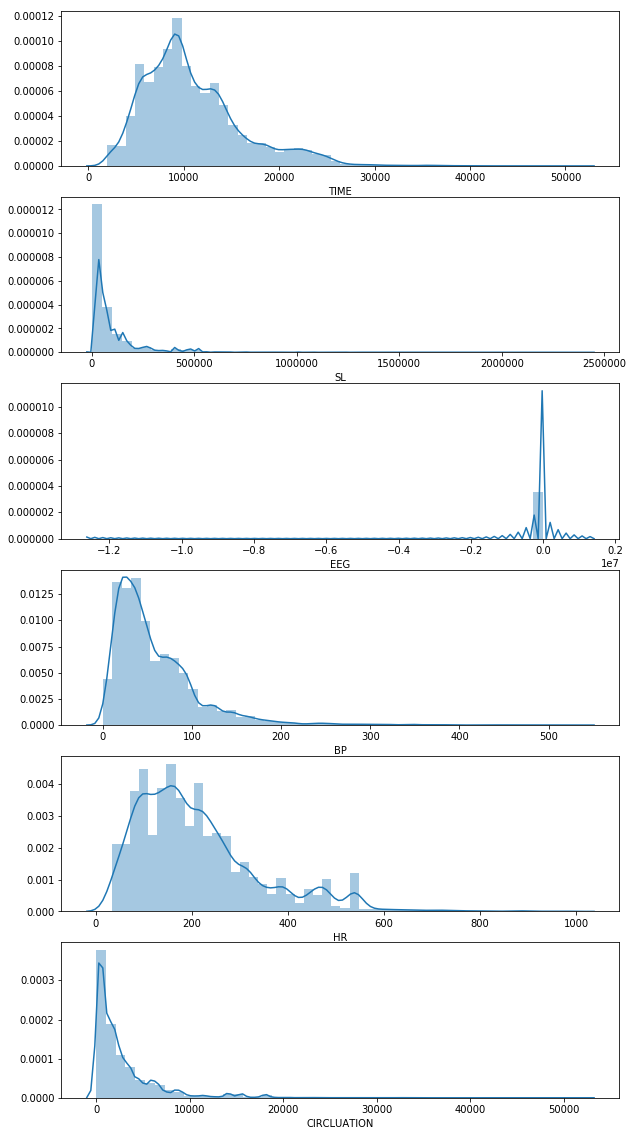

In [20]:
# Let's look at some plots now
fig = plt.figure(figsize = (10, 20)) # (Breite, Lange)
for i in range (0, len(cols)):
    fig.add_subplot(len(cols), 1, i+1)
    sns.distplot(detectfall[cols[i]]);

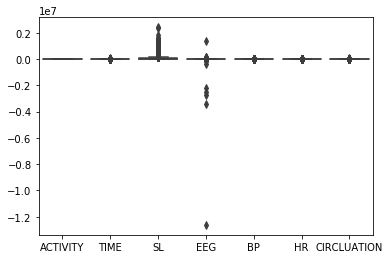

In [21]:
# Boxplot
sns.boxplot(data = detectfall)

In [24]:
# It looks like we have some heavy outliers in the EEG column. Since it is only a few value, we need to cut them out of the distribution. Also, SL has some outliers that need to be removed
detectfall = detectfall[(detectfall['EEG'] < detectfall['EEG'].quantile(0.999) ) 
& (detectfall['EEG'] > detectfall['EEG'].quantile(0.001))]

# For SL
detectfall = detectfall[(detectfall['SL'] < detectfall['SL'].quantile(0.999) ) 
& (detectfall['SL'] > detectfall['SL'].quantile(0.001))]

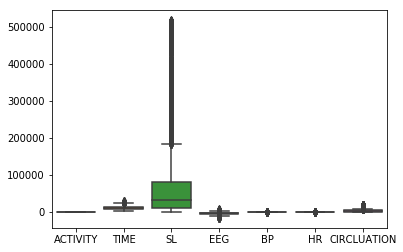

In [25]:
# Let us look at another boxplot of detectfall
sns.boxplot(data = detectfall)

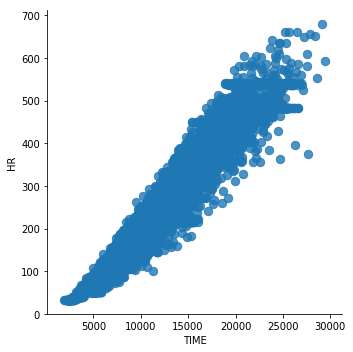

In [28]:
# Before we start with the regression, we should take a time to look at what a picture of the data looks like. 
sns.lmplot('TIME', 'HR', data = detectfall,
          palette='Set1', fit_reg=False, scatter_kws={"s": 70})

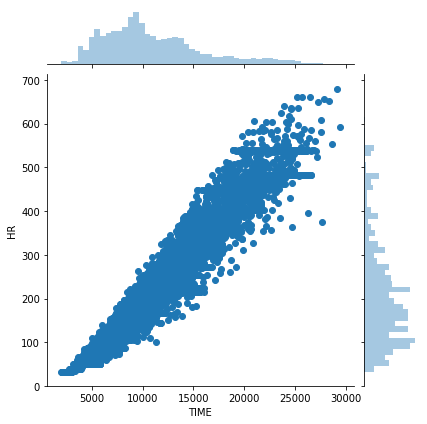

In [29]:
# We could as well do a joint plot with seaborn to gather both histogram and scatter plot. This is one of the thing I like with seaborn. It gives you more option than matplotlib.
sns.jointplot('TIME', 'HR', detectfall)

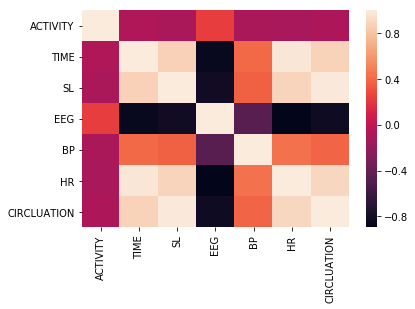

In [30]:
# Another great feature that comes with seaborn is the heatmap plot. It allows you to see a plot of the correlation that each attribute has with each other. So here, I am sure you can see that the darker an attribute is in comparison with another, the least like there is any correlation between these two attributes. Just as in statistics, the closer the probability is to 1, the more there is a correlation; if it is closer to 0, the least likelyhood there is a correlation. So, this heatmap from seaborn just basically answered a few questions we may have had. This is very cool!!!
sns.heatmap(detectfall.corr())

In [31]:
# MACHINE LEARNING

In [32]:
from sklearn.model_selection import train_test_split

# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
# It is time to split the data and create a training and testing set
target = detectfall['ACTIVITY']
attribute = detectfall[['TIME','SL','EEG','BP','HR','CIRCLUATION']]

# Training and test sets
X_train, X_test, y_train, y_test = train_test_split(attribute, target, test_size = 0.3, random_state = 101)

In [34]:
# Classifiers testing
LogR = LogisticRegression()
LogR.fit (X_train, y_train)
pred = LogR.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

C:\Users\Delmafia91\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Delmafia91\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3827031543764362

In [ ]:
# STILL IN PROGRESS